# probando voila
#### Este repositorio tiene los materiales para visualizar unos mapas y crear una aplicacion web con voila y mybinder.

<details>
    <summary><strong>Meta</strong></summary>
    "La meta de este notebook es recrear la figura X del reporte XYZ ..."
    <ul>
        <li> Metas mensurables </li>
        <li> Ej 1: Identificar <i>variables de interes en el conjunto de datos <strong>nombre_chido_de_conjunto_de_datos.csv</strong></i> </li>
        <li> Ej 2: Crear un <i>dataset trabajable</i> de los datos en bruto.</li>
    </ul>
</details>

<details>
    <summary><strong>Contexto</strong></summary>
    Contexto en este momento (por ejemplo, "hemos descargado datos sin procesar de <strong><i>website.com</i> </strong> y ahora estamos en el proceso de crear un masterfile").
    <li> ¿Cuál es el objetivo final de este proyecto? </li>
    <li> ¿Qué estamos tratando de recrear? ¿Dónde estamos en el proceso? </li>
    <li> Cualquier enlace a documentación / figuras. </li>
</details>

In [1]:
import pandas as pd
import geopandas as gpd
from zipfile import ZipFile
from pathlib import Path
from herramientas import arbol
from datetime import datetime as dt
%matplotlib inline

hoy = dt.today().strftime("%d-%b-%y")

hoy

'21-Jun-19'

In [2]:
DATOS_BRUTOS = Path("../datos/brutos/")
DATOS_INTERINOS = Path("../datos/interinos/")
DATOS_PROCESADOS = Path("../datos/procesados/")
DATOS_EXTERNOS = Path("../datos/externos/")

In [3]:
arbol(DATOS_BRUTOS)

+ ..\datos\brutos
    + Base de datos de pobreza AGEB segun entidad federativa 2015.zip


## Datos geograficos

In [4]:
ZipFile(DATOS_PROCESADOS / "AGEBS.zip").extractall(DATOS_PROCESADOS / 'AGEBs')

In [5]:
arbol(DATOS_PROCESADOS)

+ ..\datos\procesados
    + agebs
        + areas_geoestadisticas_basicas.cpg
        + areas_geoestadisticas_basicas.dbf
        + areas_geoestadisticas_basicas.prj
        + areas_geoestadisticas_basicas.shp
        + areas_geoestadisticas_basicas.shx
    + agebs.zip


In [6]:
geodatos = gpd.read_file(DATOS_PROCESADOS / 'agebs' / 'areas_geoestadisticas_basicas.shp')

In [7]:
geodatos.shape

(17470, 4)

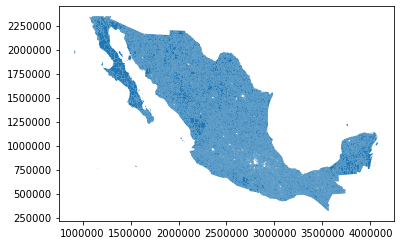

In [8]:
geodatos.plot();

In [9]:
geodatos.head()

,CVE_ENT,CVE_MUN,CVE_AGEB,geometry
0,01,002,001-4,"POLYGON ((2494680.261000015 1141224.505500004,..."
1,01,002,006-7,"POLYGON ((2506704.45250101 1118955.3730195, 25..."
2,01,002,002-9,"POLYGON ((2500046.294000991 1133965.186819509,..."
3,01,002,003-3,"POLYGON ((2499989.778101 1131864.2056195, 2499..."
4,01,002,004-8,"POLYGON ((2482775.844400006 1122937.793900001,..."


In [10]:
geodatos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17470 entries, 0 to 17469
Data columns (total 4 columns):
CVE_ENT     17470 non-null object
CVE_MUN     17470 non-null object
CVE_AGEB    17470 non-null object
geometry    17470 non-null object
dtypes: object(4)
memory usage: 546.0+ KB


## Datos pobreza

In [11]:
ZipFile(DATOS_BRUTOS / 'Base de datos de pobreza AGEB segun entidad federativa 2015.zip').extractall(DATOS_INTERINOS / 'datos_pobreza')

In [12]:
arbol(DATOS_INTERINOS / 'datos_pobreza')

+ ..\datos\interinos\datos_pobreza
    + Base de datos de pobreza AGEB segun entidad federativa 2015.xlsx


In [13]:
archivo_excel = pd.ExcelFile(DATOS_INTERINOS / 'datos_pobreza' / 'Base de datos de pobreza AGEB segun entidad federativa 2015.xlsx')

In [14]:
archivo_excel.sheet_names

['Índice',
 'Aguascalientes',
 'Baja California  ',
 'Baja California Sur ',
 'Campeche',
 'Coahuila',
 'Colima',
 'Chiapas',
 'Chihuahua',
 'Ciudad de México',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'México',
 'Michoacán',
 'Morelos',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz',
 'Yucatán',
 'Zacatecas']

Nota: Cada pestaña tiene la tabla de un estado. Los encabezados estan en la línea 5 pero los datos no comienzan hasta la línea 8.

In [15]:
estado = archivo_excel.parse('Aguascalientes', header = 4, converters = {"Clave de municipio": str})
estado.dropna(axis = 1, how = 'all', inplace = True)
estado.dropna(how = 'any', inplace = True)

estado.head()

,Clave de entidad,Entidad federativa,Clave de municipio,Municipio,Clave de AGEB,Rango de pobreza (%),Rango de pobreza extrema (%)
2,01,Aguascalientes,01001,Aguascalientes,0100100010229,"[ 0, 18]","[ 0, 20]"
3,01,Aguascalientes,01001,Aguascalientes,0100100010233,"(34, 50]","[ 0, 20]"
4,01,Aguascalientes,01001,Aguascalientes,0100100010286,"[ 0, 18]","[ 0, 20]"
5,01,Aguascalientes,01001,Aguascalientes,0100100010290,"[ 0, 18]","[ 0, 20]"
6,01,Aguascalientes,01001,Aguascalientes,0100100010303,"(18, 34]","[ 0, 20]"


In [16]:
estado.reset_index(inplace = True)
estado.drop(columns = 'index', inplace = True)

In [17]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 7 columns):
Clave de entidad                415 non-null object
Entidad 
federativa             415 non-null object
Clave de municipio              415 non-null object
Municipio                       415 non-null object
Clave de 
AGEB                  415 non-null object
Rango de pobreza (%)            415 non-null object
Rango de pobreza extrema (%)    415 non-null object
dtypes: object(7)
memory usage: 22.8+ KB


In [18]:
estado_cve_ent = estado['Clave de entidad'].unique()[0]

In [19]:
mascara_estado = geodatos['CVE_ENT'] == estado_cve_ent

In [20]:
geodatos[mascara_estado]

,CVE_ENT,CVE_MUN,CVE_AGEB,geometry
0,01,002,001-4,"POLYGON ((2494680.261000015 1141224.505500004,..."
1,01,002,006-7,"POLYGON ((2506704.45250101 1118955.3730195, 25..."
2,01,002,002-9,"POLYGON ((2500046.294000991 1133965.186819509,..."
3,01,002,003-3,"POLYGON ((2499989.778101 1131864.2056195, 2499..."
4,01,002,004-8,"POLYGON ((2482775.844400006 1122937.793900001,..."
5,01,011,009-A,"POLYGON ((2478645.632599997 1113314.513999993,..."
6,01,011,010-2,"POLYGON ((2476703.935000002 1110329.250399998,..."
7,01,011,008-5,"POLYGON ((2485534.555999994 1117425.793900002,..."
8,01,007,001-0,"POLYGON ((2461225.024100993 1148924.304819502,..."
9,01,007,004-4,"POLYGON ((2468986.514600009 1142375.570500005,..."


In [21]:
estado.head()

,Clave de entidad,Entidad federativa,Clave de municipio,Municipio,Clave de AGEB,Rango de pobreza (%),Rango de pobreza extrema (%)
0,01,Aguascalientes,01001,Aguascalientes,0100100010229,"[ 0, 18]","[ 0, 20]"
1,01,Aguascalientes,01001,Aguascalientes,0100100010233,"(34, 50]","[ 0, 20]"
2,01,Aguascalientes,01001,Aguascalientes,0100100010286,"[ 0, 18]","[ 0, 20]"
3,01,Aguascalientes,01001,Aguascalientes,0100100010290,"[ 0, 18]","[ 0, 20]"
4,01,Aguascalientes,01001,Aguascalientes,0100100010303,"(18, 34]","[ 0, 20]"


In [22]:
estado.rename(columns = {'Clave de entidad': 'CVE_ENT'}, inplace = True)

In [23]:
estado['CVE_MUN'] = estado['Clave de municipio'].str[-3:]

In [24]:
estado['CVE_AGEB'] = estado['Clave de \nAGEB'].str[-4:]

In [25]:
estado.head()

,CVE_ENT,Entidad federativa,Clave de municipio,Municipio,Clave de AGEB,Rango de pobreza (%),Rango de pobreza extrema (%),CVE_MUN,CVE_AGEB
0,01,Aguascalientes,01001,Aguascalientes,0100100010229,"[ 0, 18]","[ 0, 20]",001,0229
1,01,Aguascalientes,01001,Aguascalientes,0100100010233,"(34, 50]","[ 0, 20]",001,0233
2,01,Aguascalientes,01001,Aguascalientes,0100100010286,"[ 0, 18]","[ 0, 20]",001,0286
3,01,Aguascalientes,01001,Aguascalientes,0100100010290,"[ 0, 18]","[ 0, 20]",001,0290
4,01,Aguascalientes,01001,Aguascalientes,0100100010303,"(18, 34]","[ 0, 20]",001,0303


In [26]:
geodatos_estado = geodatos[mascara_estado].copy()

In [27]:
geodatos_estado['CVE_AGEB'] = geodatos_estado['CVE_AGEB'].str.replace("-", "")

In [28]:
geodatos_estado.head()

,CVE_ENT,CVE_MUN,CVE_AGEB,geometry
0,01,002,0014,"POLYGON ((2494680.261000015 1141224.505500004,..."
1,01,002,0067,"POLYGON ((2506704.45250101 1118955.3730195, 25..."
2,01,002,0029,"POLYGON ((2500046.294000991 1133965.186819509,..."
3,01,002,0033,"POLYGON ((2499989.778101 1131864.2056195, 2499..."
4,01,002,0048,"POLYGON ((2482775.844400006 1122937.793900001,..."


In [29]:
geodatos_estado.columns

Index(['CVE_ENT', 'CVE_MUN', 'CVE_AGEB', 'geometry'], dtype='object')

In [30]:
estado.columns

Index(['CVE_ENT', 'Entidad \nfederativa', 'Clave de municipio', 'Municipio',
       'Clave de \nAGEB', 'Rango de pobreza (%)',
       'Rango de pobreza extrema (%)', 'CVE_MUN', 'CVE_AGEB'],
      dtype='object')

In [31]:
estado.set_index(['CVE_ENT', 'CVE_MUN', 'CVE_AGEB'], inplace = True)
geodatos_estado.set_index(['CVE_ENT', 'CVE_MUN', 'CVE_AGEB'], inplace = True)

In [35]:
estado.reset_index(inplace = True)
geodatos_estado.reset_index(inplace = True)

In [37]:
estado.join(geodatos_estado, on=['CVE_ENT', 'CVE_MUN', 'CVE_AGEB'],)

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [38]:
estado.head()

,CVE_ENT,CVE_MUN,CVE_AGEB,Entidad federativa,Clave de municipio,Municipio,Clave de AGEB,Rango de pobreza (%),Rango de pobreza extrema (%)
0,01,001,0229,Aguascalientes,01001,Aguascalientes,0100100010229,"[ 0, 18]","[ 0, 20]"
1,01,001,0233,Aguascalientes,01001,Aguascalientes,0100100010233,"(34, 50]","[ 0, 20]"
2,01,001,0286,Aguascalientes,01001,Aguascalientes,0100100010286,"[ 0, 18]","[ 0, 20]"
3,01,001,0290,Aguascalientes,01001,Aguascalientes,0100100010290,"[ 0, 18]","[ 0, 20]"
4,01,001,0303,Aguascalientes,01001,Aguascalientes,0100100010303,"(18, 34]","[ 0, 20]"


In [39]:
geodatos_estado.head()

,CVE_ENT,CVE_MUN,CVE_AGEB,geometry
0,01,002,0014,"POLYGON ((2494680.261000015 1141224.505500004,..."
1,01,002,0067,"POLYGON ((2506704.45250101 1118955.3730195, 25..."
2,01,002,0029,"POLYGON ((2500046.294000991 1133965.186819509,..."
3,01,002,0033,"POLYGON ((2499989.778101 1131864.2056195, 2499..."
4,01,002,0048,"POLYGON ((2482775.844400006 1122937.793900001,..."


In [40]:
estado['CVE_UNICA'] = estado['CVE_ENT'] + estado['CVE_MUN'] + estado['CVE_AGEB']
geodatos_estado['CVE_UNICA'] = geodatos_estado['CVE_ENT'] + geodatos_estado['CVE_MUN'] + geodatos_estado['CVE_AGEB']

In [41]:
estado.head()

,CVE_ENT,CVE_MUN,CVE_AGEB,Entidad federativa,Clave de municipio,Municipio,Clave de AGEB,Rango de pobreza (%),Rango de pobreza extrema (%),CVE_UNICA
0,01,001,0229,Aguascalientes,01001,Aguascalientes,0100100010229,"[ 0, 18]","[ 0, 20]",010010229
1,01,001,0233,Aguascalientes,01001,Aguascalientes,0100100010233,"(34, 50]","[ 0, 20]",010010233
2,01,001,0286,Aguascalientes,01001,Aguascalientes,0100100010286,"[ 0, 18]","[ 0, 20]",010010286
3,01,001,0290,Aguascalientes,01001,Aguascalientes,0100100010290,"[ 0, 18]","[ 0, 20]",010010290
4,01,001,0303,Aguascalientes,01001,Aguascalientes,0100100010303,"(18, 34]","[ 0, 20]",010010303


In [42]:
geodatos_estado.head()

,CVE_ENT,CVE_MUN,CVE_AGEB,geometry,CVE_UNICA
0,01,002,0014,"POLYGON ((2494680.261000015 1141224.505500004,...",010020014
1,01,002,0067,"POLYGON ((2506704.45250101 1118955.3730195, 25...",010020067
2,01,002,0029,"POLYGON ((2500046.294000991 1133965.186819509,...",010020029
3,01,002,0033,"POLYGON ((2499989.778101 1131864.2056195, 2499...",010020033
4,01,002,0048,"POLYGON ((2482775.844400006 1122937.793900001,...",010020048


In [47]:
geodatos_estado[['CVE_UNICA', 'geometry']].join(estado[['CVE_UNICA', 'Rango de pobreza (%)', 'Rango de pobreza extrema (%)']], lsuffix ='_l')

,CVE_UNICA_l,geometry,CVE_UNICA,Rango de pobreza (%),Rango de pobreza extrema (%)
0,010020014,"POLYGON ((2494680.261000015 1141224.505500004,...",010010229,"[ 0, 18]","[ 0, 20]"
1,010020067,"POLYGON ((2506704.45250101 1118955.3730195, 25...",010010233,"(34, 50]","[ 0, 20]"
2,010020029,"POLYGON ((2500046.294000991 1133965.186819509,...",010010286,"[ 0, 18]","[ 0, 20]"
3,010020033,"POLYGON ((2499989.778101 1131864.2056195, 2499...",010010290,"[ 0, 18]","[ 0, 20]"
4,010020048,"POLYGON ((2482775.844400006 1122937.793900001,...",010010303,"(18, 34]","[ 0, 20]"
5,01011009A,"POLYGON ((2478645.632599997 1113314.513999993,...",010010322,"[ 0, 18]","[ 0, 20]"
6,010110102,"POLYGON ((2476703.935000002 1110329.250399998,...",010010337,"(50, 70]","[ 0, 20]"
7,010110085,"POLYGON ((2485534.555999994 1117425.793900002,...",010010341,"(18, 34]","[ 0, 20]"
8,010070010,"POLYGON ((2461225.024100993 1148924.304819502,...",010010356,"(18, 34]","[ 0, 20]"
9,010070044,"POLYGON ((2468986.514600009 1142375.570500005,...",010010360,"[ 0, 18]","[ 0, 20]"
